In [2]:
# adaboost gradientboost clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
url = 'data/heart_disease_ind_2015.csv'

df = pd.read_csv(url)

In [5]:
# setup baseline
df.HeartDiseaseorAttack.value_counts(normalize=True)

0.0    0.905814
1.0    0.094186
Name: HeartDiseaseorAttack, dtype: float64

In [40]:
X = df.drop(columns='HeartDiseaseorAttack')
y = df['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [7]:
pipe_ada = Pipeline([
    ('ss', StandardScaler()),
    ('abc', AdaBoostClassifier(learning_rate=0.5, n_estimators=50, random_state=1))
])

pipe_grad = Pipeline([
    ('ss', StandardScaler()),
    ('gbc', GradientBoostingClassifier(random_state=1))
])

pipe_km = Pipeline([
    ('ss', StandardScaler()),
    ('km', KMeans(random_state=1))
])

pipe_dbs = Pipeline([
    ('ss', StandardScaler()),
    ('dbs', DBSCAN())
])

pipe_xgb = Pipeline([
    ('ss', StandardScaler()),
    ('xgb', xgb.XGBClassifier())
])

In [8]:
pipe_ada.fit(X_train, y_train)

pipe_ada.score(X_train, y_train), pipe_ada.score(X_test, y_test)

(0.9073268159360874, 0.9073793755912961)

In [9]:
pipe_grad.fit(X_train, y_train)

pipe_grad.score(X_train, y_train), pipe_grad.score(X_test, y_test)

(0.908525176074845, 0.9079943235572374)

In [10]:
pipe_xgb.fit(X_train, y_train)

pipe_xgb.score(X_train, y_train), pipe_xgb.score(X_test, y_test)

(0.9147902869757174, 0.9070167139703563)

## GridSearching for hyperparams - DON'T run these!

This excludes the clustering models below.

In [12]:
#ada_params = {
#    'n_estimators': [25, 50, 100, 250],
#    'learning_rate': [0.5, 1.0, 1.5, 2.0, 2.5],
#}

#gs_ada = GridSearchCV(AdaBoostClassifier(), param_grid=ada_params, cv=5, verbose=1)

# Fit the GridSearchCV object to the data
#gs_ada.fit(pipe_ada['ss'].fit_transform(X_train), y_train)



In [60]:
#gs_ada.best_params_

{'learning_rate': 0.5, 'n_estimators': 25}

In [65]:
#gs_ada.best_score_

0.9074529591085883

In [13]:
# grad_params = {
#     'n_estimators': [50, 100, 250, 500],
#     'min_samples_split': [2, 5, 10],
# }

# gs_grad = GridSearchCV(GradientBoostingClassifier(), param_grid=grad_params, cv=5, verbose=1)

# # Fit the GridSearchCV object to the data
# gs_grad.fit(pipe_grad['ss'].fit_transform(X_train), y_train)


In [66]:
#gs_grad.best_params_

{'min_samples_split': 2, 'n_estimators': 50}

In [67]:
#gs_grad.best_score_

0.9081520025228634

In [70]:
# xgb_params = {
#     'n_estimators': [25, 50, 100, 250],
#     'learning_rate': [0.5, 1.0, 1.5, 2.0],
# }

# gs_xgb = GridSearchCV(xgb.XGBClassifier(), param_grid=xgb_params, cv=2, verbose=1)

# # Fit the GridSearchCV object to the data
# gs_xgb.fit(pipe_xgb['ss'].fit_transform(X_train), y_train)


Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.5, 1.0, 1.5, 2.0],
                         'n_estimators': [25, 50, 100, 250]},
             verbose=1)

In [71]:
#gs_xgb.best_params_

{'learning_rate': 0.5, 'n_estimators': 25}

In [14]:
#gs_xgb.best_score_

## Don't run these lol

In [22]:
pipe_km.fit(df)

silhouette_score(pipe_km['ss'].fit_transform(df), pipe_km['km'].labels_), pipe_km['km'].inertia_

(0.08162067175369862, 4688375.300274653)

now evaluating k=2
now evaluating k=3
now evaluating k=4
now evaluating k=5
now evaluating k=6
now evaluating k=7
now evaluating k=8
now evaluating k=9
now evaluating k=10
now evaluating k=11
now evaluating k=12
now evaluating k=13
now evaluating k=14
now evaluating k=15


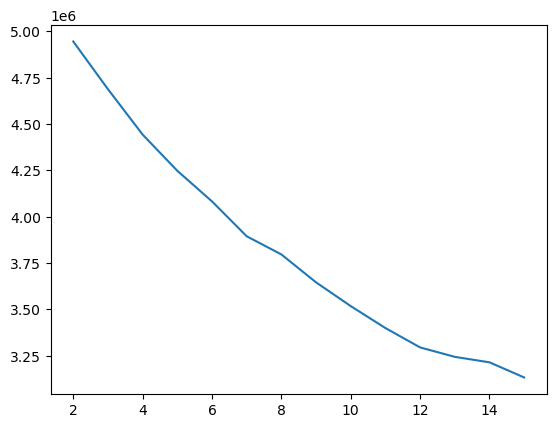

In [27]:
scores = []

for k in range(2, 16):
    print(f'now evaluating k={k}')
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(pipe_km['ss'].fit_transform(df))
    scores.append([k, kmeans.inertia_])

inertia_df = pd.DataFrame(scores, columns=['n_clusters', 'inertia'])
plt.plot(inertia_df['n_clusters'], inertia_df['inertia'])

In [23]:
pipe_dbs.fit(df)

silhouette_score(pipe_dbs['ss'].fit_transform(df), pipe_dbs['dbs'].labels_)

-0.34113081792698824

## Confusion matrices

Initial = Ada minimizes false negatives which is probably the best result for which to optimize.

True positives:  727
False positives:  651
True negatives:  56796
False negatives:  5246
Accuracy:  0.9070167139703563
True pos rate/recall/sensitivity:  0.12171438138288967
False pos rate:  0.01133218444827406
True neg rate/specificity:  0.9886678155517259
Precision:  0.5275761973875182
              precision    recall  f1-score   support

      No HDA       0.92      0.99      0.95     57447
     Yes HDA       0.53      0.12      0.20      5973

    accuracy                           0.91     63420
   macro avg       0.72      0.56      0.57     63420
weighted avg       0.88      0.91      0.88     63420



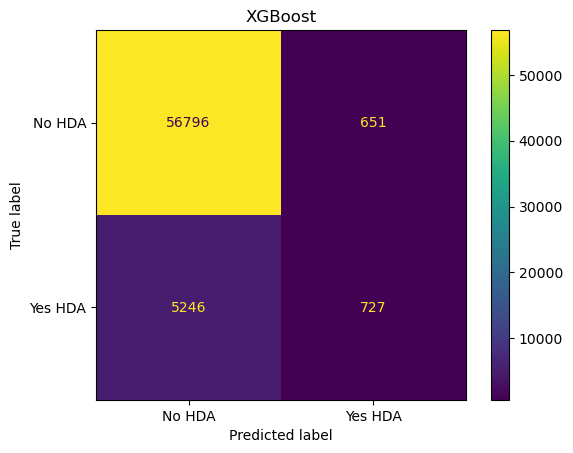

In [15]:
ConfusionMatrixDisplay.from_estimator(pipe_xgb.fit(X_train, y_train), X_test, y_test, display_labels=['No HDA', 'Yes HDA'])
plt.title('XGBoost');
predict_xgb = pipe_xgb.predict(X_test)
tp_xgb = sum((y_test == 1) & (predict_xgb == 1))
fp_xgb = sum((y_test == 0) & (predict_xgb == 1))
tn_xgb = sum((y_test == 0) & (predict_xgb == 0))
fn_xgb = sum((y_test == 1) & (predict_xgb == 0))
print('True positives: ', tp_xgb)
print('False positives: ', fp_xgb)
print('True negatives: ', tn_xgb)
print('False negatives: ', fn_xgb)

print('Accuracy: ', (tp_xgb + tn_xgb) / (tp_xgb + tn_xgb + fp_xgb + fn_xgb))
print('True pos rate/recall/sensitivity: ', tp_xgb / (tp_xgb + fn_xgb))
print('False pos rate: ', fp_xgb / (tn_xgb + fp_xgb))
print('True neg rate/specificity: ', tn_xgb / (tn_xgb + fp_xgb))
print('Precision: ', tp_xgb / (tp_xgb + fp_xgb))

from sklearn.metrics import classification_report

print(classification_report(y_test, predict_xgb, target_names=['No HDA', 'Yes HDA']))

True positives:  830
False positives:  731
True negatives:  56716
False negatives:  5143


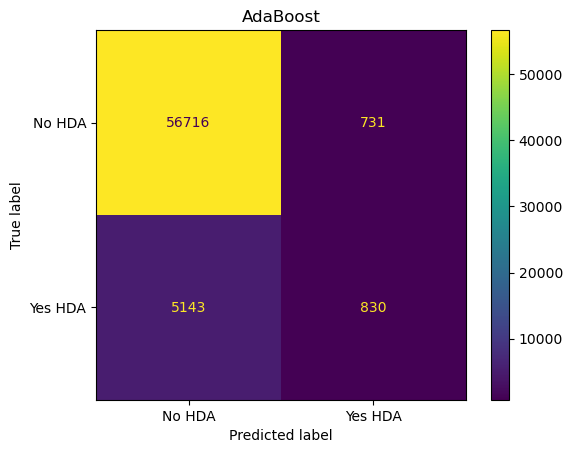

In [16]:
ConfusionMatrixDisplay.from_estimator(pipe_ada.fit(X_train, y_train), X_test, y_test, display_labels=['No HDA', 'Yes HDA'])
plt.title('AdaBoost');

predict_ada = pipe_ada.predict(X_test)
print('True positives: ', sum((y_test == 1) & (predict_ada == 1)))
print('False positives: ', sum((y_test == 0) & (predict_ada == 1)))
print('True negatives: ', sum((y_test == 0) & (predict_ada == 0)))
print('False negatives: ', sum((y_test == 1) & (predict_ada == 0)))

True positives:  687
False positives:  549
True negatives:  56898
False negatives:  5286


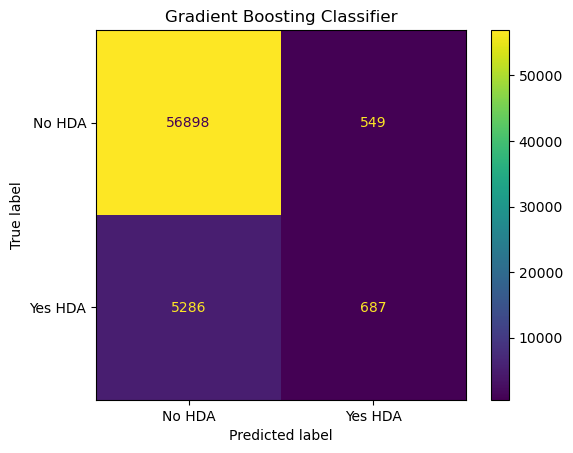

In [17]:
ConfusionMatrixDisplay.from_estimator(pipe_grad.fit(X_train, y_train), X_test, y_test, display_labels=['No HDA', 'Yes HDA'])
plt.title('Gradient Boosting Classifier');

predict_grad = pipe_grad.predict(X_test)
print('True positives: ', sum((y_test == 1) & (predict_grad == 1)))
print('False positives: ', sum((y_test == 0) & (predict_grad == 1)))
print('True negatives: ', sum((y_test == 0) & (predict_grad == 0)))
print('False negatives: ', sum((y_test == 1) & (predict_grad == 0)))

|  | XGBoost | AdaBoost | Gradient Boost |
| --- | ---: | ---: | ---: |
| True positives | 727 | 877 | 687 |
| False positives | 651 | 780 | 549 |
| True negatives | 56796 | 56667 | 56898 |
| False negatives | 5246 | 5096 | 5286 |

In [24]:
print(f'{"XGBoost" : ^50}\n\n', classification_report(y_test, predict_xgb, target_names=['No HDA', 'Yes HDA']))
print(f'{"AdaBoost" : ^50}\n\n', classification_report(y_test, predict_ada, target_names=['No HDA', 'Yes HDA']))
print(f'{"Gradient Boost" : ^50}\n\n', classification_report(y_test, predict_grad, target_names=['No HDA', 'Yes HDA']))

                     XGBoost                      

               precision    recall  f1-score   support

      No HDA       0.92      0.99      0.95     57447
     Yes HDA       0.53      0.12      0.20      5973

    accuracy                           0.91     63420
   macro avg       0.72      0.56      0.57     63420
weighted avg       0.88      0.91      0.88     63420

                     AdaBoost                     

               precision    recall  f1-score   support

      No HDA       0.92      0.99      0.95     57447
     Yes HDA       0.53      0.14      0.22      5973

    accuracy                           0.91     63420
   macro avg       0.72      0.56      0.59     63420
weighted avg       0.88      0.91      0.88     63420

                  Gradient Boost                  

               precision    recall  f1-score   support

      No HDA       0.91      0.99      0.95     57447
     Yes HDA       0.56      0.12      0.19      5973

    accuracy           

## Neural Network models

In [3]:
url = 'data/heart_disease_ind_2015.csv'

df = pd.read_csv(url)

In [15]:
X = df.drop(columns='HeartDiseaseorAttack')
y = df['HeartDiseaseorAttack'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [16]:
print(df.dtypes)
df.shape

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


(253680, 22)

In [17]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [26]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(21, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))

model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(.25))

model.add(Dense(3, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(.25))

model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

In [28]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    verbose=0
)

2022-09-20 20:35:39.858261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-09-20 20:36:29.737020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


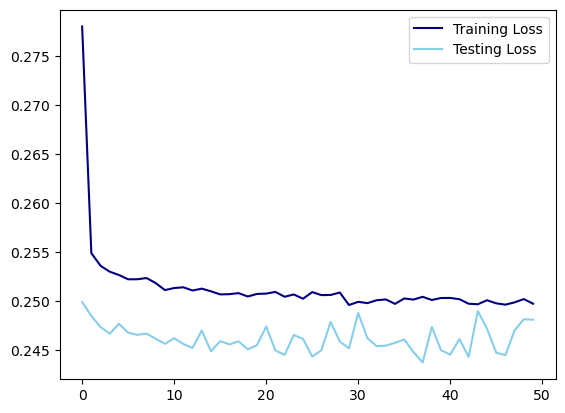

In [29]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss', color='navy')
plt.plot(test_loss, label='Testing Loss', color='skyblue')
plt.legend();